In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
meta = pd.read_csv("meta_all_gene.csv")


In [34]:
# Select only brain-related data

# tissue = "brain"
# species = "human"

# meta = meta[(meta['tissue'] == tissue) ]


In [35]:
meta.head()

,slide,species,tissue,pmid,title,abstract,keywords,involve_cancer,tech,spot_num,gene_num
0,GSE144239_GSM4284316,human,skin,"32579974,38037084",Title 1: Multimodal Analysis of Composition an...,Abstract 1: To define the cellular composition...,Keywords 1: CRISPR screen; MIBI; intra-tumoral...,True,ST,666,17138
1,GSE144239_GSM4284317,human,skin,"32579974,38037084",Title 1: Multimodal Analysis of Composition an...,Abstract 1: To define the cellular composition...,Keywords 1: CRISPR screen; MIBI; intra-tumoral...,True,ST,646,17344
2,GSE144239_GSM4284318,human,skin,"32579974,38037084",Title 1: Multimodal Analysis of Composition an...,Abstract 1: To define the cellular composition...,Keywords 1: CRISPR screen; MIBI; intra-tumoral...,True,ST,638,17883
3,GSE144239_GSM4284319,human,skin,"32579974,38037084",Title 1: Multimodal Analysis of Composition an...,Abstract 1: To define the cellular composition...,Keywords 1: CRISPR screen; MIBI; intra-tumoral...,True,ST,590,16959
4,GSE144239_GSM4284320,human,skin,"32579974,38037084",Title 1: Multimodal Analysis of Composition an...,Abstract 1: To define the cellular composition...,Keywords 1: CRISPR screen; MIBI; intra-tumoral...,True,ST,521,17689


In [36]:
s=""

## Tissue Sample Count

#### handel Subplots 

C:\Users\asus\AppData\Local\Temp\ipykernel_18768\2619085394.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\asus\AppData\Local\Temp\ipykernel_18768\2619085394.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\asus\AppData\Local\Temp\ipykernel_18768\2619085394.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\asus\AppData\Local\Temp\ipykernel_18768\2619085394.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\asus\AppData\Local\Temp\ipykernel_18768\2619085394.py:24: FutureWarning:



Passing `palette`

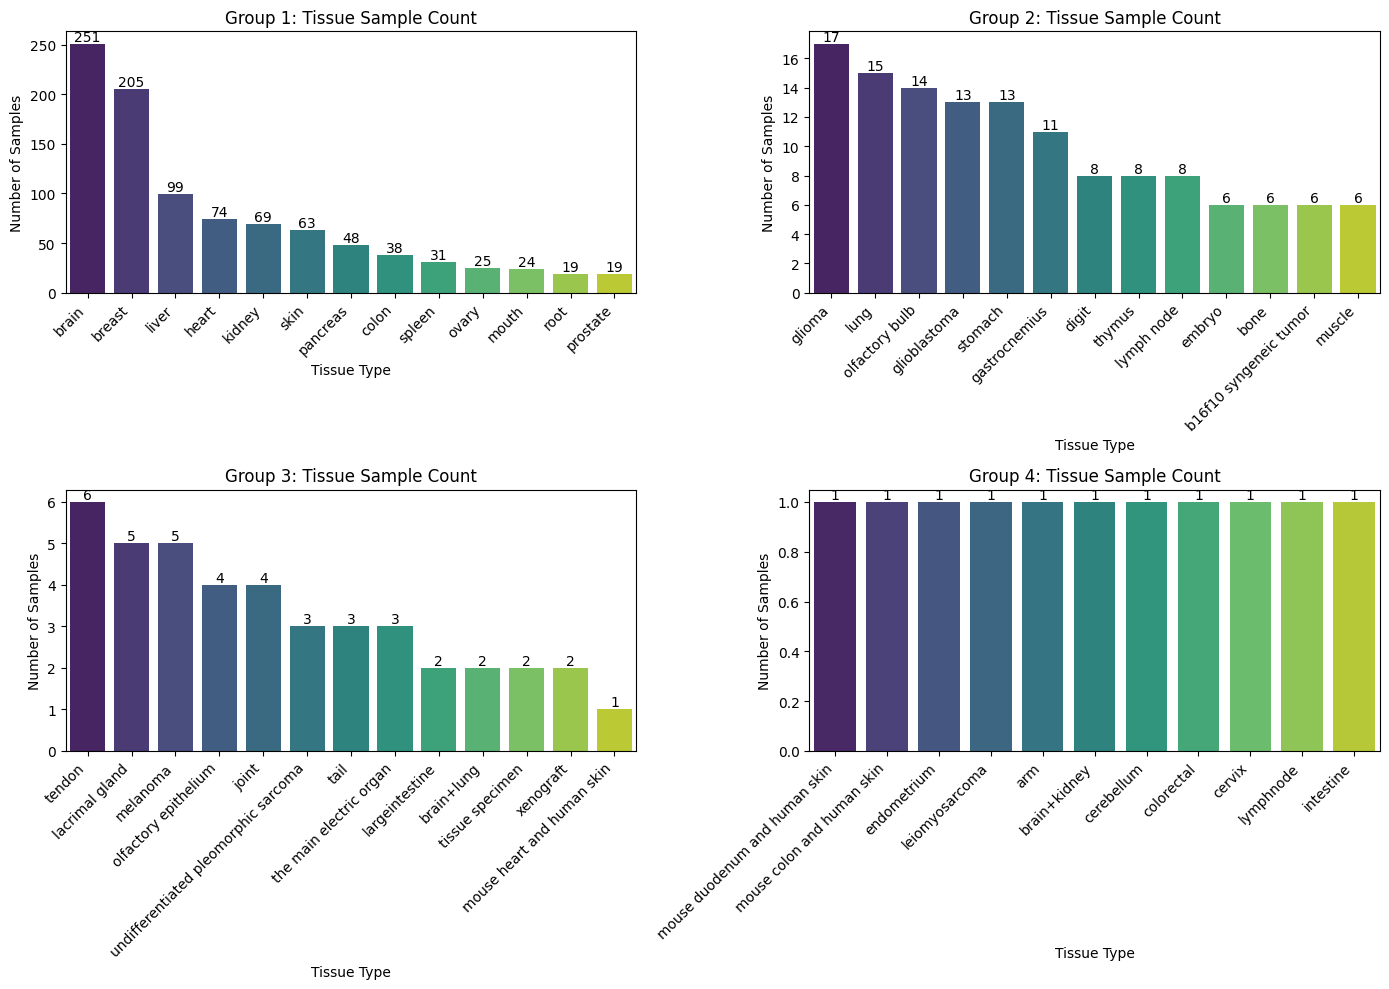

In [37]:
import math 

# Ensure 'tissue' column exists
if 'tissue' not in meta.columns:
    raise ValueError("The 'tissue' column is missing from the metadata file.")

# Count occurrences per tissue and sort
tissue_counts = meta['tissue'].value_counts().sort_values(ascending=False)

# Ensure we have at least some tissues
if tissue_counts.empty:
    raise ValueError("No tissues found in the dataset.")

# Divide into 4 groups
num_groups = 4
group_size = math.ceil(len(tissue_counts) / num_groups)
tissue_groups = [tissue_counts[i * group_size: (i + 1) * group_size] for i in range(num_groups)]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten for easier iteration
# Plot each group with value labels on bars
for i, (ax, tissue_group) in enumerate(zip(axes, tissue_groups)):
    sns.barplot(x=tissue_group.index, y=tissue_group.values, ax=ax, palette="viridis", legend=False)

    ax.set_title(f"Group {i+1}: Tissue Sample Count")
    ax.set_ylabel("Number of Samples")
    ax.set_xlabel("Tissue Type")
    ax.set_xticklabels(tissue_group.index, rotation=45, ha="right")

    # Annotate bars with actual count
    for bar, count in zip(ax.patches, tissue_group.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            bar.get_height(),  # Y position (height of bar)
            f"{count}",  # Text label (actual number)
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Adjust layout
plt.tight_layout()
plt.show()


## Cancerous vs. Non-Cancerous Sample

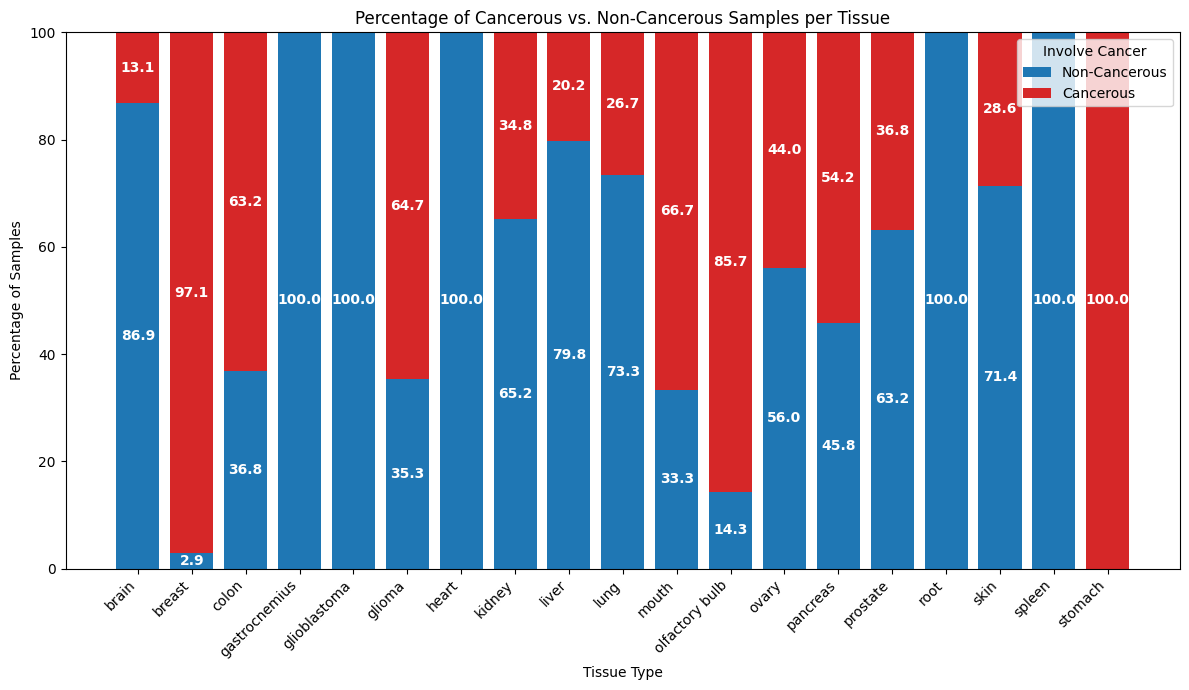

In [38]:

# Load metadata
# meta = pd.read_csv("../notebooks/meta_all_gene.csv")

# Ensure 'involve_cancer' is a string and normalize values
meta['involve_cancer'] = meta['involve_cancer'].astype(str).str.lower()

# Convert different values into consistent categories
cancer_mapping = {"true": "Cancerous",
                  "false": "Non-Cancerous"}
meta['involve_cancer'] = meta['involve_cancer'].map(cancer_mapping)

# Remove invalid values
meta = meta[meta['involve_cancer'].notna()]

# Filter tissues with more than 10 samples
tissue_counts = meta['tissue'].value_counts()
valid_tissues = tissue_counts[tissue_counts > 10].index
filtered_meta = meta[meta['tissue'].isin(valid_tissues)]

# Count cancerous vs. non-cancerous samples per tissue
cancer_counts = filtered_meta.groupby(['tissue', 'involve_cancer']).size().unstack(fill_value=0)

# Convert counts to percentages per tissue
cancer_percentages = cancer_counts.div(cancer_counts.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Define labels for bars
labels = ["Non-Cancerous", "Cancerous"]
colors = ["#1f77b4", "#d62728"]  # Blue for non-cancerous, red for cancerous

# Create stacked bar chart
bottom = np.zeros(len(cancer_percentages))  # Initial bottom for stacking
bars = []
for label, color in zip(labels, colors):
    bars.append(ax.bar(cancer_percentages.index, cancer_percentages[label], label=label, color=color, bottom=bottom))
    bottom += cancer_percentages[label].values  # Update bottom for stacking

# Add percentage labels to each section
for bar_group, label in zip(bars, labels):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Avoid labeling bars with zero height
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, f"{height:.1f}", 
                    ha='center', va='center', fontsize=10, color="white", fontweight="bold")

# Labels and title
ax.set_ylabel("Percentage of Samples")
ax.set_xlabel("Tissue Type")
ax.set_title("Percentage of Cancerous vs. Non-Cancerous Samples per Tissue")
ax.legend(title="Involve Cancer")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Show plot
plt.tight_layout()
plt.show()


In [39]:

import plotly.express as px

# Load metadata
meta = pd.read_csv("../notebooks/meta_all_gene.csv")

# Count occurrences of each species
species_counts = meta['species'].value_counts().reset_index()
species_counts.columns = ['Species', 'Count']  # Rename for clarity

# Create interactive Pie Chart
fig = px.pie(
    species_counts, 
    names="Species", 
    values="Count", 
    title="Distribution of Species in the Dataset", 
    color_discrete_sequence=px.colors.qualitative.Set3  # Nice color palette
)

# Show interactive chart
fig.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_18768\564087854.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




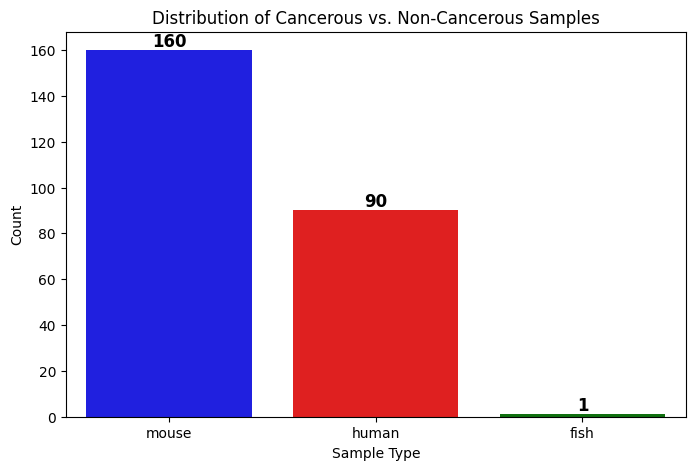

In [40]:

tissue = "brain"
# species = "human"

meta = meta[(meta['tissue'] == tissue) ]
# Step 1: Histogram - Cancerous vs. Non-Cancerous Samples
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=meta, x='species', palette=['blue', 'red','green'])

# Add text on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Positioning
                ha='center', va='bottom',  # Center alignment
                fontsize=12, color='black', fontweight='bold')

# Labels and title
plt.title("Distribution of Cancerous vs. Non-Cancerous Samples")
plt.xlabel("Sample Type")
plt.ylabel("Count")

plt.show()

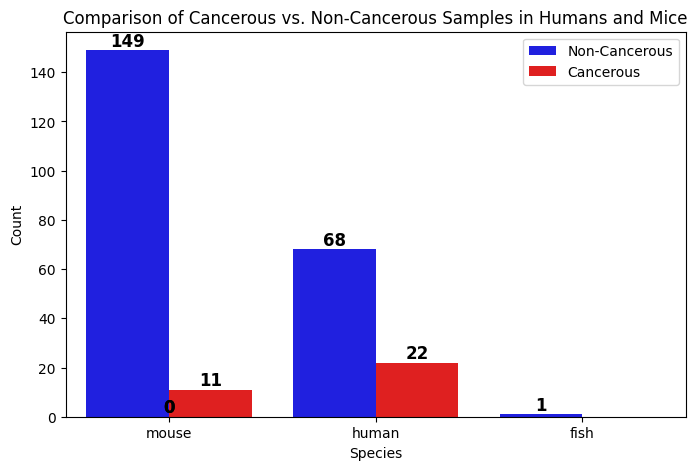

In [41]:

# Create the countplot with grouped bars
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=meta, x='species', hue='involve_cancer', palette=['blue', 'red'])

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Labels and title
plt.title("Comparison of Cancerous vs. Non-Cancerous Samples in Humans and Mice")
plt.xlabel("Species")
plt.ylabel("Count")
plt.legend(labels=["Non-Cancerous", "Cancerous"])

plt.show()

In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load data
# df = pd.read_csv("../data/all_genes/brain_count_overlap_hvg.csv", index_col=0)

# # Select only the first 5 features (genes)
# df_subset = df.iloc[:, :10]

# # Plot boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_subset)
# plt.xticks(rotation=45)
# plt.xlabel("Genes")
# plt.ylabel("Expression Level")
# plt.title("Distribution of HVG Expression Levels (First 5 Genes)")

# plt.show()


In [43]:
# plt.figure(figsize=(14, 6))
# sns.violinplot(data=df, inner="quartile", scale="width")
# plt.xticks(rotation=90)
# plt.xlabel("Genes")
# plt.ylabel("Expression Level")
# plt.title("Violin Plot of HVG Expression Levels")
# plt.show()
